<a href="https://colab.research.google.com/github/Dielugon/CoderDiegoGonzalez/blob/main/Primera_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***WATER POTABILITY***


**EL GOBIERNO DE LA INDIA NOS CONTRATO PARA REALIZAR UN MODELO MACHINE LEARNING PARA DETERMINAR LA POTABILIDAD DEL AGUA EN UN SURGENTE RECIEN DESCUBIERTO EN LA CIUDAD DE NUEVA DELHI.**

**Introducción**

El acceso al agua potable que no sea perjudicial para nuestra salud, es un derecho humano básico. Sin embargo, la disponibilidad de agua potable sigue siendo un tema de discusión en todos los rincones del mundo. En este proyecto estoy tratando de descubrir cuáles son los factores que afectan en mayor medida la potabilidad del agua y al final escribiré un algoritmo de aprendizaje automático que predecirá si el agua es segura para beber o no.


***Hipotesis***

En nuestro analisis se determinara las variables de mayor impacto en el dataset, para obetener un modelo M.L. lo mas preciso posible.

In [ ]:
#importo librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')




In [ ]:
#cargo mi dataset
url='https://raw.githubusercontent.com/Dielugon/CoderDiegoGonzalez/main/water_potability.csv'
df = pd.read_csv(url, sep= ',')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


***Descripción de la columna***

**Valor de pH:** el PH es un parámetro importante para evaluar el equilibrio ácido-base del agua. También es el indicador de la condición ácida o alcalina del estado del agua. La OMS ha recomendado un límite máximo permitido de pH de 6,5 a 8,5. Los rangos de investigación actuales fueron de 6,52 a 6,83, que se encuentran en el rango de los estándares de la OMS.

**Dureza:** La dureza es causada principalmente por las sales de calcio y magnesio. Estas sales se disuelven en los depósitos geológicos a través de los cuales viaja el agua. El tiempo que el agua está en contacto con el material que produce dureza ayuda a determinar cuánta dureza hay en el agua cruda. La dureza se definió originalmente como la capacidad del agua para precipitar el jabón provocada por el calcio y el magnesio.

**Sólidos (sólidos disueltos totales - TDS):** el agua tiene la capacidad de disolver una amplia gama de minerales o sales inorgánicos y algunos orgánicos como potasio, calcio, sodio, bicarbonatos, cloruros, magnesio, sulfatos, etc. Estos minerales produjeron un sabor no deseado. y color diluido en apariencia de agua. Este es el parámetro importante para el uso del agua. El agua con un valor alto de TDS indica que el agua está altamente mineralizada. El límite deseable para TDS es de 500 mg/l y el límite máximo es de 1000 mg/l, el cual se prescribe para beber.

**Cloraminas:** El cloro y la cloramina son los principales desinfectantes utilizados en los sistemas públicos de agua. Las cloraminas se forman más comúnmente cuando se agrega amoníaco al cloro para tratar el agua potable. Los niveles de cloro de hasta 4 miligramos por litro (mg/L o 4 partes por millón (ppm)) se consideran seguros en el agua potable.

**Sulfato:** Los sulfatos son sustancias naturales que se encuentran en minerales, suelos y rocas. Están presentes en el aire ambiente, el agua subterránea, las plantas y los alimentos. El principal uso comercial del sulfato es en la industria química. La concentración de sulfato en el agua de mar es de aproximadamente 2700 miligramos por litro (mg/L). Varía de 3 a 30 mg/L en la mayoría de los suministros de agua dulce, aunque en algunas ubicaciones geográficas se encuentran concentraciones mucho más altas (1000 mg/L).

**Conductividad:** El agua pura no es un buen conductor de la corriente eléctrica, sino un buen aislante. El aumento de la concentración de iones mejora la conductividad eléctrica del agua. Generalmente, la cantidad de sólidos disueltos en el agua determina la conductividad eléctrica. La conductividad eléctrica (CE) en realidad mide el proceso iónico de una solución que le permite transmitir corriente. Según los estándares de la OMS, el valor de CE no debe exceder los 400 μS/cm.

**Carbono_orgánico:** El carbono orgánico total (TOC) en las fuentes de agua proviene de materia orgánica natural (NOM) en descomposición, así como de fuentes sintéticas. TOC es una medida de la cantidad total de carbono en compuestos orgánicos en agua pura. Según la EPA de EE. UU., < 2 mg/L como TOC en agua tratada/potable y < 4 mg/L en agua de origen que se utiliza para tratamiento.

**Trihalometanos:** los THM son sustancias químicas que se pueden encontrar en el agua tratada con cloro. La concentración de THM en el agua potable varía según el nivel de materia orgánica en el agua, la cantidad de cloro necesaria para tratar el agua y la temperatura del agua que se está tratando. Se consideran seguros niveles de THM de hasta 80 ppm en el agua potable.

**Turbidez:** La turbidez del agua depende de la cantidad de materia sólida presente en estado suspendido. Es una medida de las propiedades emisoras de luz del agua y la prueba se utiliza para indicar la calidad de la descarga de desechos con respecto a la materia coloidal. El valor medio de turbidez obtenido para Wondo Genet Campus (0,98 NTU) es inferior al valor recomendado por la OMS de 5,00 NTU.

**Potabilidad:** Indica si el agua es segura para el consumo humano donde 1 significa Potable y 0 significa No potable.


In [ ]:
#informacion de los datos
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


(3276, 10)

**Tenemos un dataset formado por 10 columnas y 3276 filas.**

In [ ]:
#Informacion estadistica
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# ***VISUALIZACION DE DATOS***

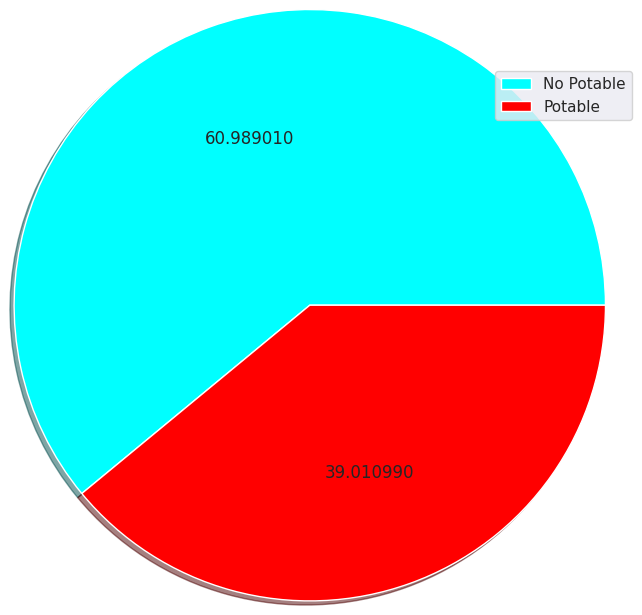

In [ ]:
plt.pie(df['Potability'].value_counts(),shadow=True, autopct="%f", colors=['aqua', 'red'], radius=2)
plt.legend(['No Potable','Potable'],loc=(1,1));

**Una gran parte de las muestras de agua dadas no es potable.**

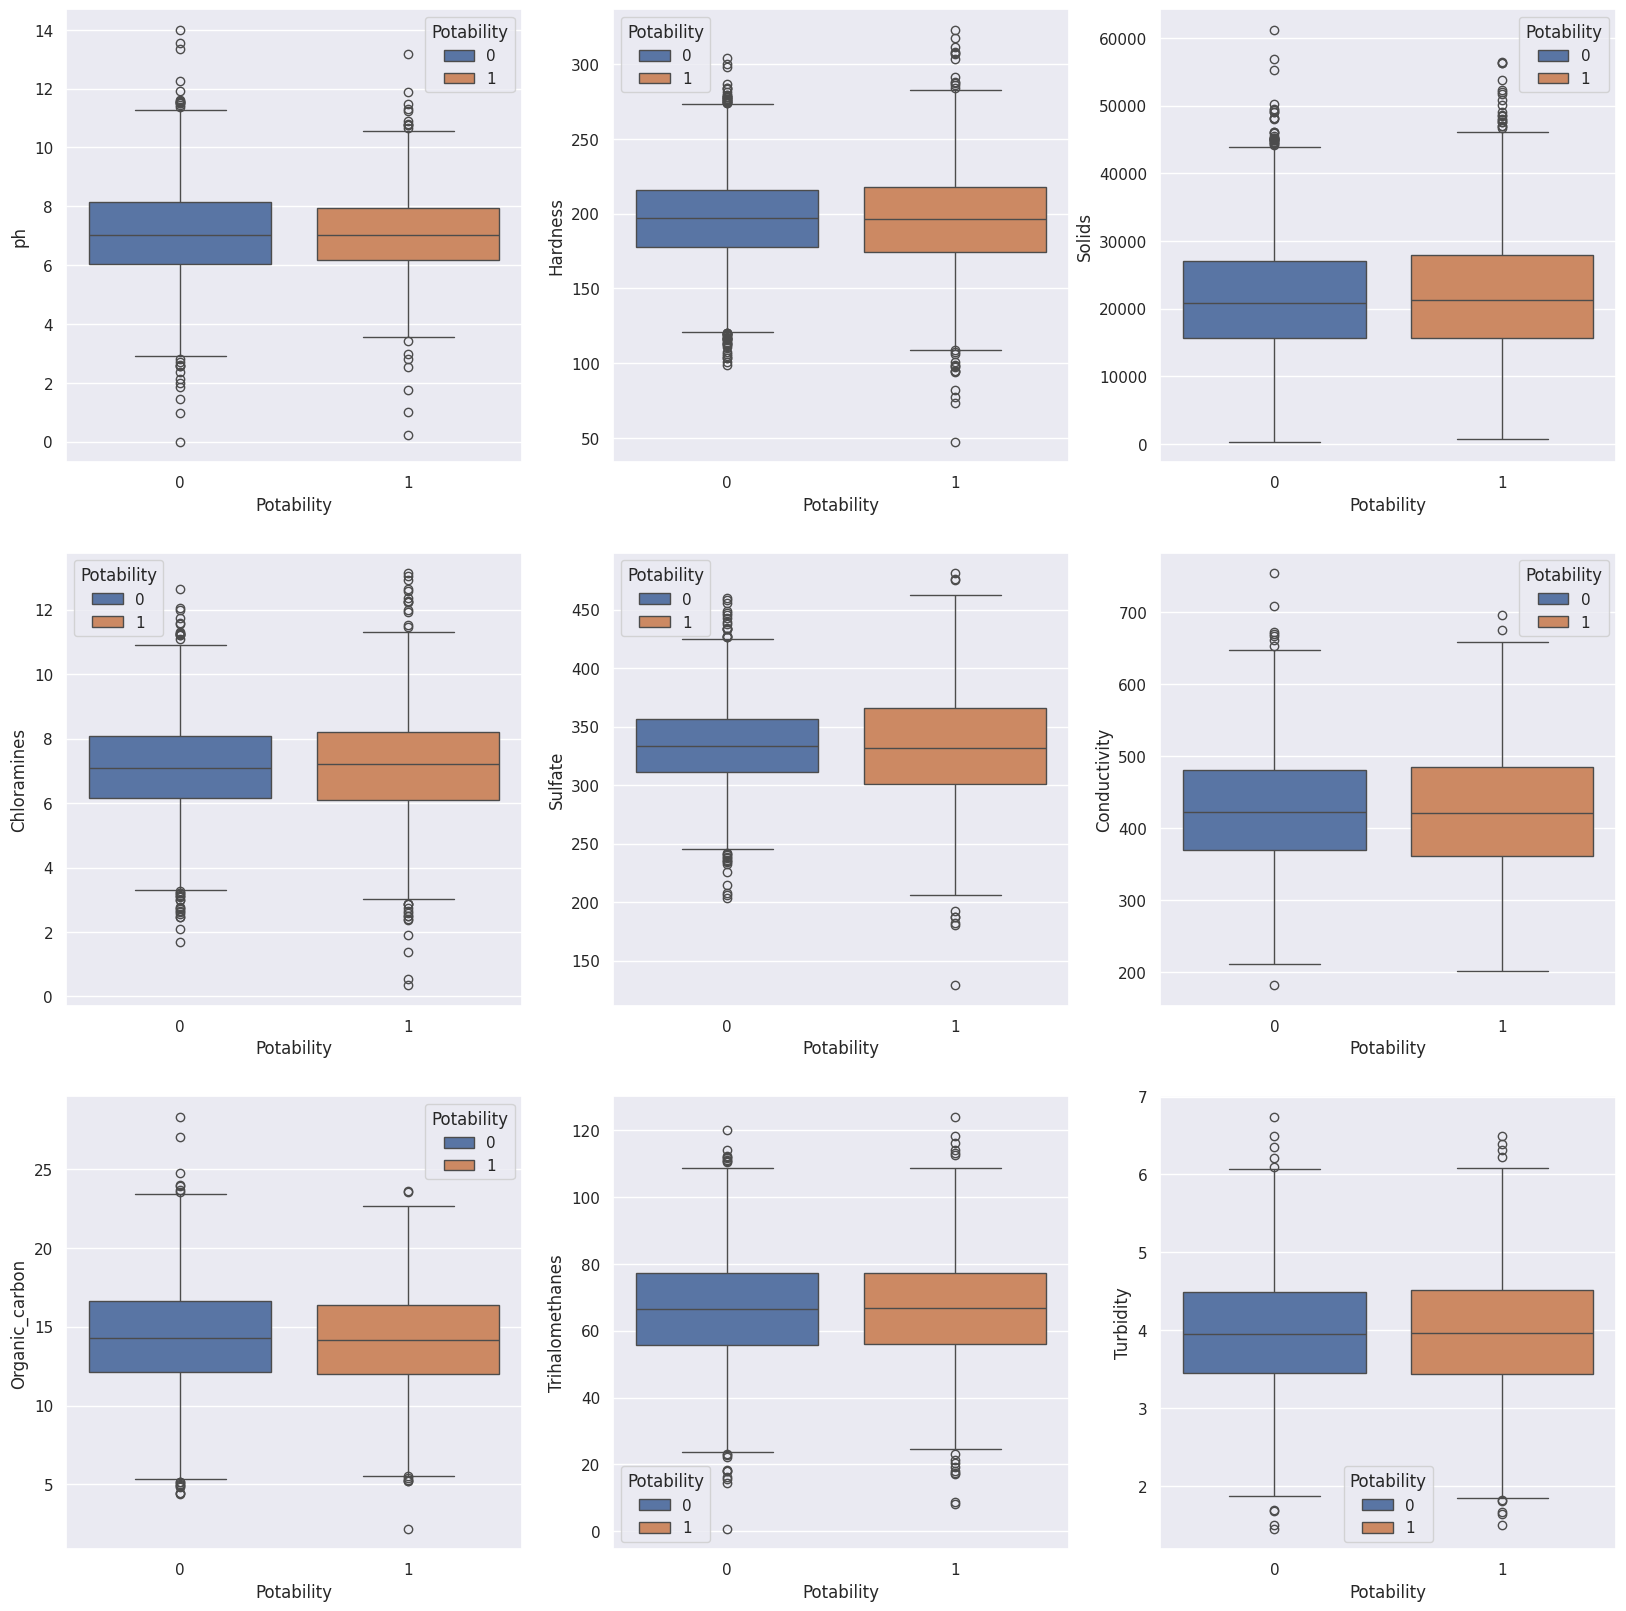

In [ ]:
#Ahora intentaremos encontrar la relación de los atributos numéricos con la potabilidad.
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(20, 20))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.boxplot(x=df.Potability, y=df[attributes[k]], ax=axes[i,j], hue=df.Potability)
        k=k+1


**La relación individual de la variable independiente con la variable dependiente es la menos significativa.**

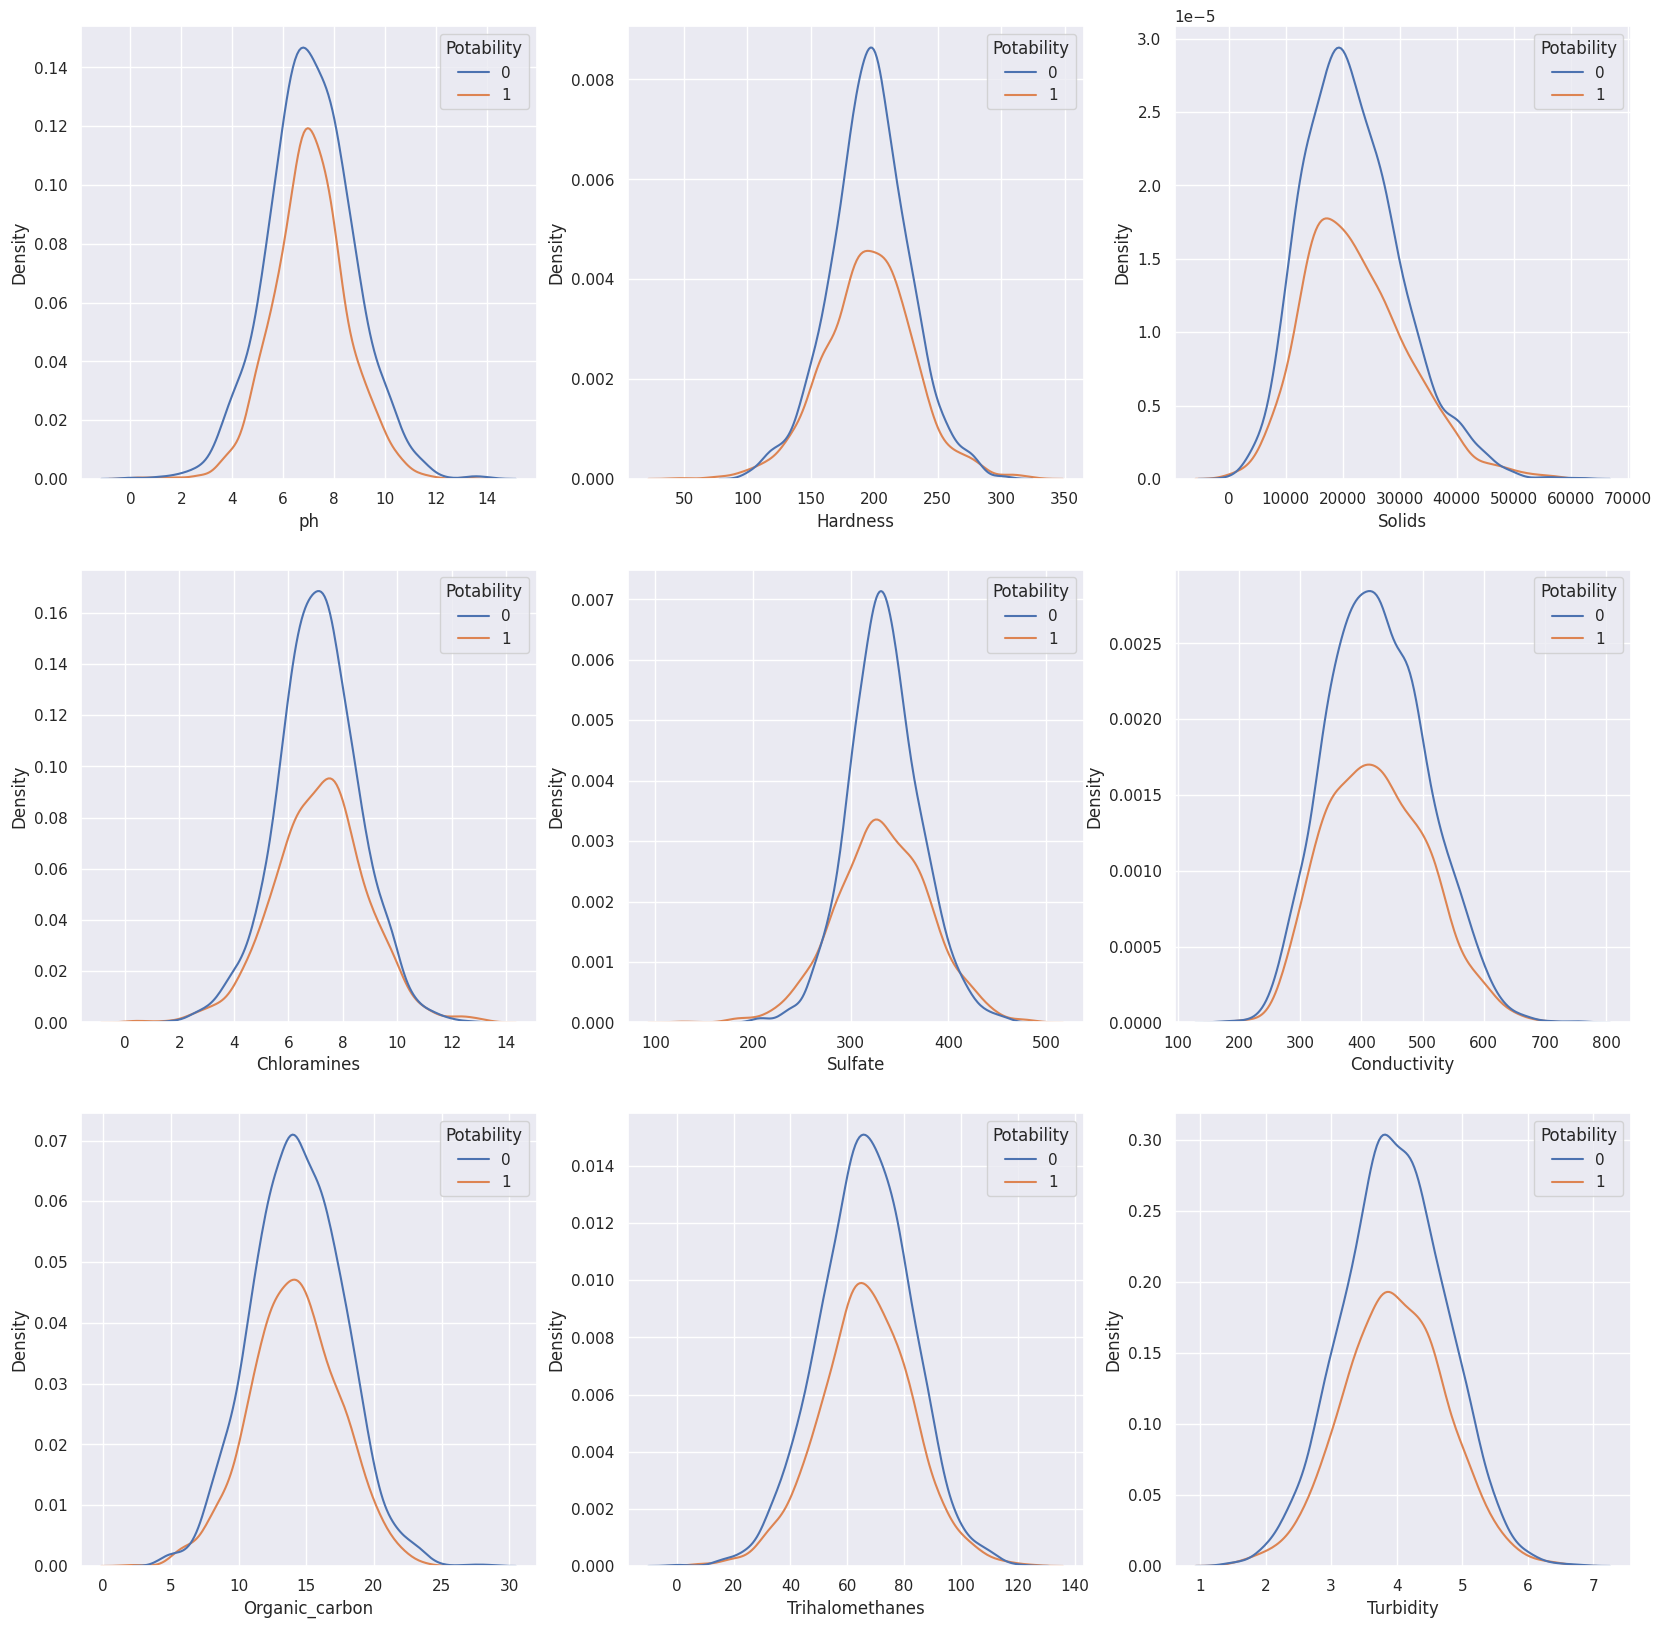

In [ ]:
#Ahora intentaremos encontrar la relación de los atributos numéricos con la potabilidad.
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(20, 20))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
          sns.kdeplot(hue=df.Potability, x=df[attributes[k]], ax=axes[i,j])
          k=k+1

**Todos los atributos siguen casi la misma distribución (con diferentes alturas) y su promedio se encuentra cerca de los mismos puntos de datos independientemente de la potabilidad.**

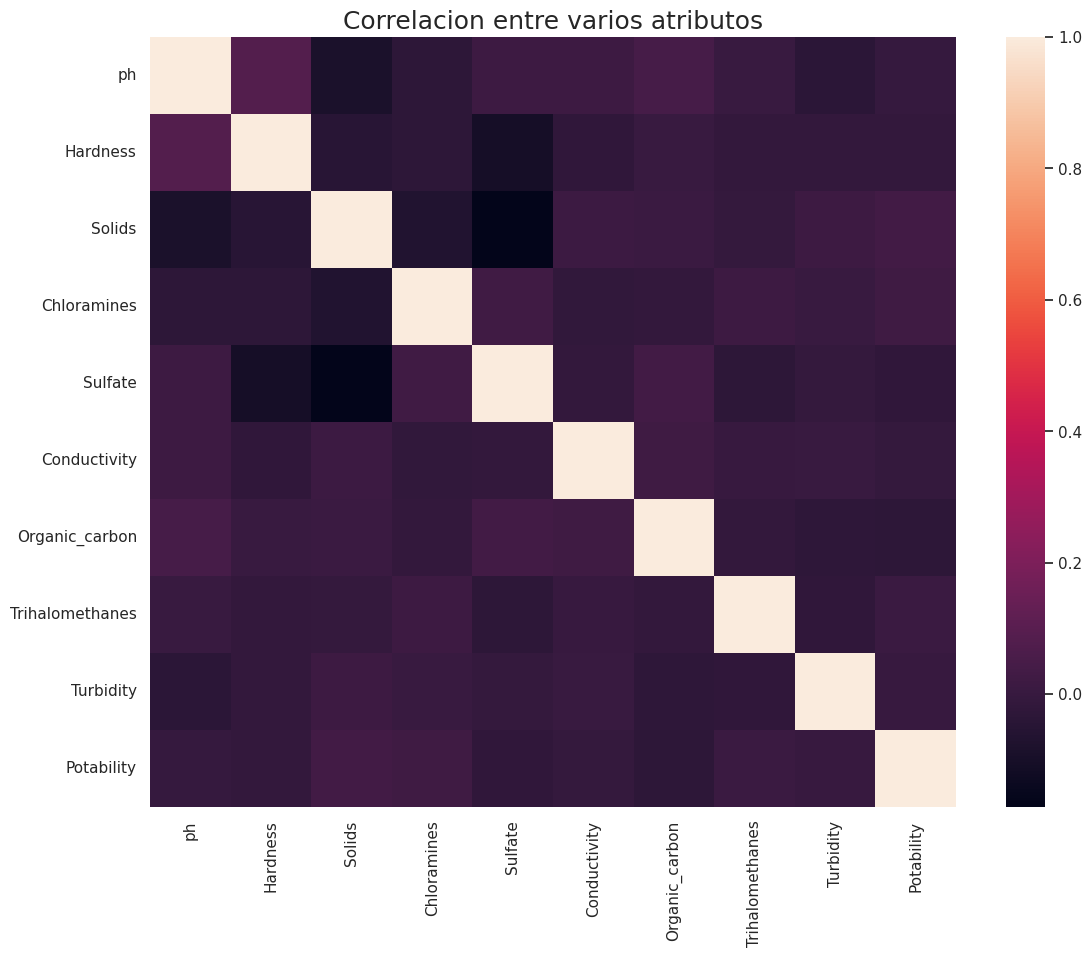

In [ ]:
#Verifico si hay correlacion entre las variables
plt.figure(figsize=(13,10))
sns.heatmap(df.corr())
plt.title('Correlacion entre varios atributos', fontsize=18);

**No existe ninguna correlación significativa entre ninguno de los atributos.**

# ***VALORES NULOS***

In [ ]:
#analizando y remplazando valores nulos
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


**Completar los valores faltantes: realizaremos un mapeo condicional para completar los valores faltantes**.

In [ ]:
cond=df['Potability']==0

df['ph'].fillna(cond.map({True:df.loc[df['Potability']==0]['ph'].median(),
                                False:df.loc[df['Potability']==1]['ph'].median()
                                }),inplace=True)

df['Sulfate'].fillna(cond.map({True:df.loc[df['Potability']==0]['Sulfate'].median(),
                                False:df.loc[df['Potability']==1]['Sulfate'].median()
                                }),inplace=True)

df['Trihalomethanes'].fillna(cond.map({True:df.loc[df['Potability']==0]['Trihalomethanes'].median(),
                                False:df.loc[df['Potability']==1]['Trihalomethanes'].median()
                                }),inplace=True)

In [ ]:
#comprobamos que ya no hay datos nulos
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# ***SCALING***

**Reduciremos todos los puntos de datos en el rango de 0 a 1, para que nuestro algoritmo no tenga que lidiar con una variedad de rangos amplios.**

In [ ]:
input_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [ ]:

scaler = MinMaxScaler()
scaler.fit(df[input_cols])
df[input_cols] = scaler.transform(df[input_cols])
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502533,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0
1,0.265434,0.297400,0.300611,0.491839,0.580601,0.719411,0.497319,0.450999,0.576793,0
2,0.578509,0.641311,0.321619,0.698543,0.580601,0.414652,0.562017,0.532866,0.303637,0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0


In [ ]:
#Min-Max rango despues de scaling
df.describe().T[['min','max']].T

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# ***MODELO***

In [ ]:
#Separar la variable de respuesta del conjunto de datos
X=df.drop('Potability',axis=1)
y=df['Potability']

In [ ]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
#train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
clf=DecisionTreeClassifier(random_state=41,max_depth=6,min_samples_split=0.03)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
pred=clf.predict(X_train)
print("Accuracy of training data :",accuracy_score( y_train.values,pred))
print("Accuracy of validation data :",accuracy_score(y_test.values,Y_pred))

Accuracy of training data : 0.8005698005698005
Accuracy of validation data : 0.7814407814407814


**Nota: Se deben ajustar los valores del clasificador de modo que la precisión de la validación aumente incluso si esto causa una reducción en la precisión del entrenamiento.**

## ***MATRIZ CONFUSION***

**Anteriormente habíamos visto que una gran parte de las muestras de agua no es potable, eso significa que nuestro conjunto de datos está desequilibrado y necesitamos una matriz de confusión para evaluar nuestro modelo.**

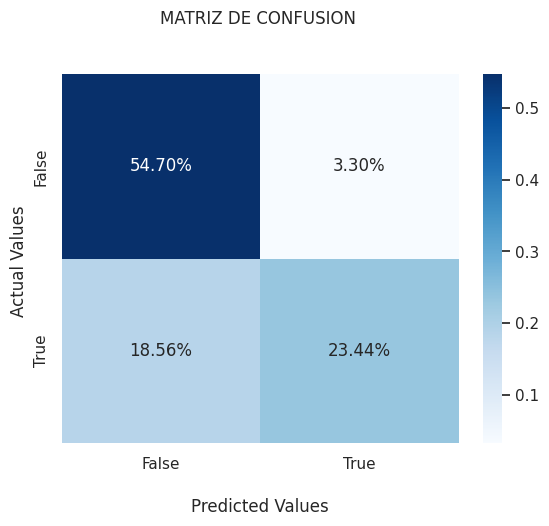

In [ ]:
cf_matrix=confusion_matrix(y_test,Y_pred)
labels=['True Negative','False Positive','False Negative','True Positive']
labels=np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('MATRIZ DE CONFUSION \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

**Como podemos ver que los porcentajes de Verdadero Positivo y Verdadero Negativo son más altos que los de Falso Positivo (también conocido como Error de Tipo I) y Falso Negativo (también conocido como Error de Tipo II), podemos con seguridad que nuestro modelo hace predicciones justas**.

# ***FEATURE DE IMPORTANCIA***

**Destaca qué características pasadas a un modelo tienen un mayor grado de impacto para generar una predicción que otras.**

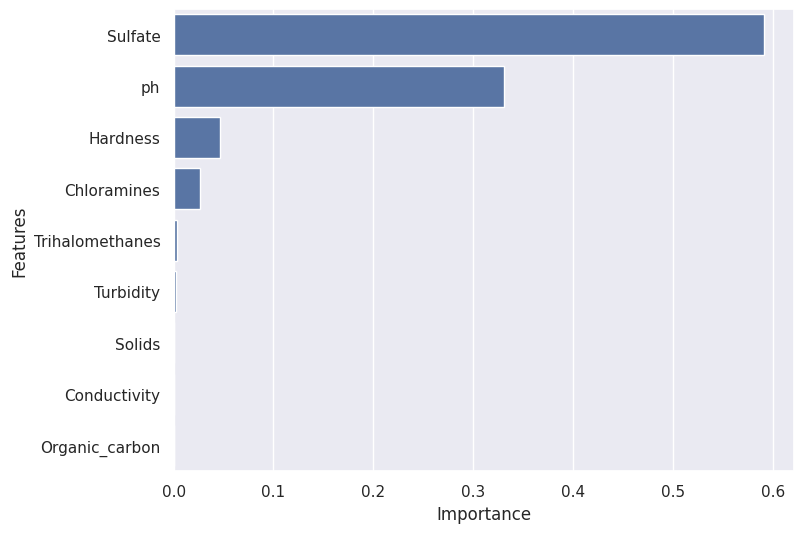

In [ ]:
feature_importance = pd.DataFrame({'Features':X.columns,
                                   'Importance':clf.feature_importances_
                                  }).sort_values('Importance', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Features']);

# ***Decision Tree***

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20),dpi=500)
tree.plot_tree(clf,feature_names=attributes, class_names=None,filled=True,rounded=True)
plt.show();

# ***CONCLUSIONES***

**1) Este modelo clasifica los datos con una precisión aceptable del 78,14%**.

**2) Aunque no existe ninguna correlación significativa entre ninguno de los atributos independientes o los atributos independientes y dependientes, hay pocos atributos que desempeñan un papel de medida en la clasificación**.

**3) Del gráfico de barras de importancia de las características podemos concluir que nuestro modelo da alta prioridad a la concentración de pH y de sulfate del agua para la clasificación**.

**4) De manera similar, nuestro modelo le da importancia cero a factores como el trihalomethanes, la conductivity y el orgánic_carbon en las aguas de origen, lo que implica que son menos efectivos para determinar la potabilidad del agua**.